# A Gentle Introduction to Stochastic Differential Equations (SDEs)

---

## **Ordinary Differential Equations (ODEs)**

An ODE has the form:

$$
y'(t) = f(t, y(t))
$$

with initial condition $y(0)$ specified.  
Example:

$$
y'(t) = y(t), \quad y(0) = 1
$$

has solution:

$$
y(t) = e^t
$$

A standard numerical approach is to express it in differential form:

$$
dy(t) = f(t, y(t))\,dt
$$

and integrate:

$$
y(t) = y(0) + \int_0^t f(s, y(s))\,ds
$$

Approximate this integral via **Euler’s method**:

$$
y(t+\Delta) - y(t) \approx f(t, y(t))\Delta
$$

or equivalently:

$$
y(t+\Delta) \approx y(t) + f(t, y(t))\Delta
$$

Hence the discrete updates are:

$$
\begin{aligned}
y(\Delta) &= y(0) + f(0, y(0))\Delta, \\
y(2\Delta) &= y(\Delta) + f(\Delta, y(\Delta))\Delta, \\
y(3\Delta) &= y(2\Delta) + f(2\Delta, y(2\Delta))\Delta, \quad \ldots
\end{aligned}
$$

---

## **Brownian Motion**

Brownian motion can be viewed as a limiting case of a rescaled random walk.

Let $\Delta > 0$ and $\delta_1, \delta_2, \ldots$ be i.i.d. random variables with $\delta_i \sim N(0,1)$.  
Define:

$$
X_n = X_{n-1} + \delta_n, \quad n = 1, 2, \ldots
$$

Then the rescaled process is:

$$
B_{n\Delta} = B_{(n-1)\Delta} + \sqrt{\Delta}\,\delta_n, \quad B_0 = 0
$$

As $\Delta \to 0$, we obtain **Brownian motion** $B_t$ satisfying:

1. $B_0 = 0$
2. **Independent increments:** for $0 = t_0 < t_1 < \dots < t_k$,
   $B_{t_1} - B_{t_0}, \dots, B_{t_k} - B_{t_{k-1}}$ are independent.
3. $B_t - B_s \sim N(0, t-s)$ for $t > s$.
4. $t \mapsto B_t$ is continuous but nowhere differentiable with probability 1.

The covariance is:

$$
\text{Cov}(B_s, B_t) = \min(s, t)
$$

---

## **Stochastic Differential Equations (SDEs)**

An SDE generalizes ODEs by allowing infinitesimal random shocks.  
For example:

$$
dS_t = f(t, S_t)\,dt + g(t, S_t)\,dB_t
$$

This means that for small $\Delta$:

$$
S_{t+\Delta} - S_t = f(t, S_t)\Delta + g(t, S_t)(B_{t+\Delta} - B_t)
$$

If we approximate $B_{t+\Delta} - B_t = \sqrt{\Delta}\,\delta$ where $\delta = \pm1$ with probability $1/2$,  
then the numerical scheme is:

$$
\begin{aligned}
S_0 &= 0, \\
S_\Delta &= S_0 + f(0, S_0)\Delta + g(0, S_0)\sqrt{\Delta}\,\delta_1, \\
S_{2\Delta} &= S_\Delta + f(\Delta, S_\Delta)\Delta + g(\Delta, S_\Delta)\sqrt{\Delta}\,\delta_2, \\
S_{3\Delta} &= S_{2\Delta} + f(2\Delta, S_{2\Delta})\Delta + g(2\Delta, S_{2\Delta})\sqrt{\Delta}\,\delta_3, \ldots
\end{aligned}
$$

---

### **Note on Increments**

We can approximate Brownian motion using jumps whose distribution has mean 0 and variance $\Delta$,  
i.e. standard deviation $\sqrt{\Delta}$.  
Jumps can be chosen as $\pm\sqrt{\Delta}$ with equal probability or $N(0,\Delta)$ distributed — both yield the same limiting process as $\Delta \to 0$ (via the Central Limit Theorem).

---

## **Ito’s Lemma**

For a process $S_t$ satisfying:

$$
dS_t = f(t, S_t)\,dt + g(t, S_t)\,dB_t
$$

and a function $Y_t = h(t, S_t)$ (smooth in both $t$ and $S_t$), Ito’s Lemma gives the differential:

$$
dh(t, S_t) =
\left(
\frac{\partial h}{\partial t}(t, S_t) +
\frac{\partial h}{\partial S}(t, S_t)f(t, S_t) +
\frac{1}{2}\frac{\partial^2 h}{\partial S^2}(t, S_t) g^2(t, S_t)
\right)dt +
\frac{\partial h}{\partial S}(t, S_t) g(t, S_t)\,dB_t
$$

---

### **Intuitive Derivation**

Using Taylor expansion:

$$
h(t+dt, S_t+dS_t) \approx h(t, S_t) +
\frac{\partial h}{\partial t}dt +
\frac{\partial h}{\partial S}dS_t +
\frac{1}{2}\frac{\partial^2 h}{\partial S^2}(dS_t)^2
$$

Substituting $dS_t = f\,dt + g\,dB_t$:

$$
(dS_t)^2 = (f\,dt + g\,dB_t)^2 = f^2\,dt^2 + 2fg\,dt\,dB_t + g^2(dB_t)^2
$$

Since higher-order terms vanish ($dt^2$ and $dt\,dB_t$ negligible) but $(dB_t)^2 = dt$, we get:

$$
(dS_t)^2 = g^2\,dt
$$

Substituting back gives the Ito correction term:

$$
\frac{1}{2} g^2 \frac{\partial^2 h}{\partial S^2} dt
$$

---

## **Example 1: Brownian Motion with Drift**

Let $S_t = B_t$. Then $dS_t = dB_t$, i.e. $f=0$, $g=1$.  
Define:

$$
Y_t = \mu t + \sigma B_t = h(t, B_t), \quad h_t = \mu, \, h_B = \sigma
$$

Then by Ito’s lemma:

$$
dY_t = \mu\,dt + \sigma\,dB_t
$$

This is **Brownian motion with drift**.

---

## **Example 2: Geometric Brownian Motion**

Let:

$$
dY_t = \mu\,dt + \sigma\,dB_t, \quad Y_t = \log X_t
$$

Then $X_t = e^{Y_t}$ satisfies:

$$
dX_t = \left(\mu + \frac{1}{2}\sigma^2\right)X_t\,dt + \sigma X_t\,dB_t
$$

---

### **Exercise**

If:

$$
dX_t = \mu X_t\,dt + \sigma X_t\,dB_t
$$

what SDE does $\log(X_t)$ satisfy?

---

## **Calibration of the GBM Model**

Suppose we observe $G_t$ at times $t_0=0 < t_1 < \cdots < t_N$.  
Define:

$$
\Delta t_i = t_{i+1} - t_i, \quad
\Delta \log G_i = \log G_{t_{i+1}} - \log G_{t_i}
$$

Then:

$$
\Delta \log G_i \sim N(\mu \Delta t_i, \sigma^2 \Delta t_i)
$$

and the log-likelihood is:

$$
\log L(\mu, \sigma) =
-\frac{N}{2}\log(2\pi)
- N\log(\sigma)
- \frac{1}{2}\sum_{i=0}^{N-1}\log(\Delta t_i)
- \frac{1}{2\sigma^2}\sum_{i=0}^{N-1}
\frac{(\Delta \log G_i - \mu \Delta t_i)^2}{\Delta t_i}
$$

---

### **Estimators**

Maximizing with respect to $\mu$:

$$
\hat{\mu} =
\frac{\sum_{i=0}^{N-1} \Delta \log G_i}
{\sum_{i=0}^{N-1} \Delta t_i}
= \frac{\log G_{t_N} - \log G_0}{t_N - t_0}
= \frac{\log G_{t_N} - \log G_0}{t_N}
$$

and its distribution:

$$
\hat{\mu} \sim N\left(\mu, \frac{\sigma^2}{t_N}\right)
$$

Substituting $\hat{\mu}$ and maximizing with respect to $\sigma$:

$$
\hat{\sigma} =
\sqrt{
\frac{1}{N}\sum_{i=0}^{N-1}
\frac{(\Delta \log G_i - \hat{\mu}\,\Delta t_i)^2}{\Delta t_i}
}
$$

**Ordinary Differential Equations**

We're going to focus on solving an ordinary differential equation of the form:

$$
x'(t) = f(x,t)
$$

with specified initial condition $x(0) = x_0,$ for a given function $f$ of two variables. 

Here, we seek a function $x(t).$ It is helpful to think of a particle starting in position $x_0$ at time 0 and whose velocity $x'(t)$ at time $t$ is determined by its current position $x(t)$ and the time $t.$

There are some instances in which one can solve such a differential equation in closed form.
Since we're going to introduce a numerical approach to solving, it will help to have examples where the exact solution is known so that we can see how the numerical approach performs.

Consider the case when 

$$
f(x,t) = \frac{\sin(2\pi t) + 2\pi t \cos(2\pi t)}{x}.
$$

Here are equation is *separable* since we can write $x'(t) = \frac{dx}{dt}$ and our equation takes the form

$$
x dx = (sin(2\pi t) + 2\pi t \cos(2\pi t)) dt
$$

and integrating both sides gives a general solution:

$$
\frac{1}{2} x^2 = t \sin(2\pi t) + C.
$$

or

$$
x = \sqrt{2t \sin(2\pi t) + 2C}.
$$

So our solution is to take

$$
x(t) = \sqrt{2t \sin(2\pi t) + 2C},
$$

where the constant $C$ is determined from the initial condition.

For example, if we assume $x(0) = 5$ then our solution is

$$
x(t) = \sqrt{2t \sin(2\pi t) + 25},
$$


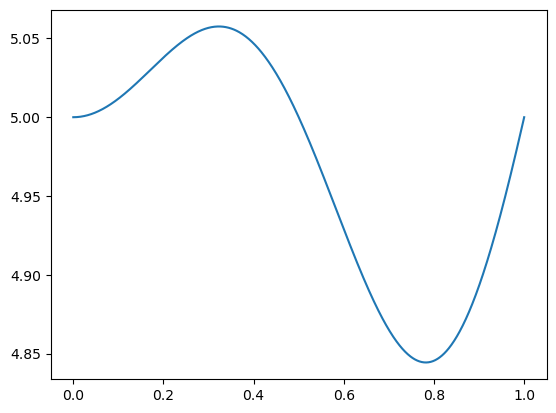

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t0=np.linspace(0,1.,1000)
x0=np.sqrt(2*t0*np.sin(2*np.pi*t0)+25.)
plt.plot(t0,x0)

**Euler Scheme**

The idea behind the Euler scheme is to iteratively approximate our position in a small time step from now using the fact that we know our current position and current velocity.

If we know $x(t)$ and $x'(t)=f(x(t),t)$ then in a small $\Delta$ time step we have

$$
x(t+\Delta) \approx x(t) + x'(t) \Delta = x(t) + f(x(t),t))\Delta
$$

Alternatively, we can write the more suggestive expression 

$$
dx(t) = f(x(t),t) dt
$$

which will help when we talk about stochastic differential equations (SDEs).


Then, having found an approximation for $x(t+\Delta)$ we can repeat and get the approximate position at time $t+2\Delta$ viz.

$$
x(t+2\Delta) \approx x(t+\Delta) + x'(t+\Delta) \Delta = 
x(t+\Delta)+f(x(t+\Delta),t+\Delta)\Delta
$$

and so on.

Let's use the Euler scheme for the example above to get an approximation to $x(t)$ for $t\in [0,1]$ and plot it against the exact solution.

In [2]:
def f(x,t):
    return (np.sin(2*np.pi*t)+2*np.pi*t*np.cos(2*np.pi*t))/x

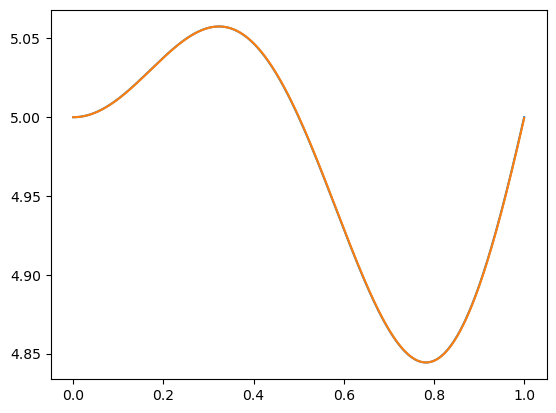

In [3]:
n=1000
delta=1/n
t1=np.linspace(0,1,n+1)
x1=np.zeros(n+1)
x1[0]=5.
for i in range(1,n+1):
    x1[i]=x1[i-1]+f(x1[i-1],t1[i-1])*delta

plt.plot(t0,x0)
plt.plot(t1,x1)

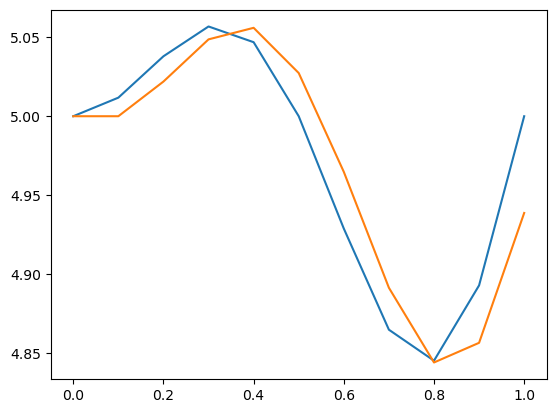

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def ODE_Solution(f,X0,T,N):
    Delta=T/N
    Tvec=np.linspace(0,T,N+1)
    X=np.zeros(N+1)
    X[0]=X0
    for i in range(N):
        X[i+1]=X[i]+f(X[i],Tvec[i])*Delta
    return Tvec,X

def f(x,t):
    return((np.sin(2*np.pi*t)+2.*np.pi*t*np.cos(2*np.pi*t))/x)

X0=5
T=1
N=10
Tvec,X=ODE_Solution(f,X0,T,N)

Xtrue=np.sqrt(2*Tvec*np.sin(2*np.pi*Tvec)+25)
plt.plot(Tvec,Xtrue)
plt.plot(Tvec,X)


**Higher-Dimensional ODEs**

The above ideas generalize in a natural way to differential equations describing motion in higher-dimensional Euclidean space $\mathbb{R}^d.$
Suppose now that our position in $\mathbb{R}^d$ at time $t$ is given by $x(t).$ Assume the starting positon at time 0 is $x_0$ and that our velocity at time $t$ is given by some vector-valued function of time and position, say
$$
\dot{x} {dx \over dt} = f(x(t),t)
$$
for some given function $f: \mathbb{R}^d \times [0,\infty) \to \mathbb{R}^d.$
We will ignore regularity conditions on these functions guaranteeing that the following scheme gives an approximation to the path we follow.

Let $\Delta>0$ be a small time unit and define $x(0)=x_0.$

Having defined $x(n\Delta)$ we take
$$
x((n+1)\Delta) = x(n\Delta) + \Delta f(x(n\Delta))
$$
for $n=0,1,\ldots.$

**A Family of Examples**

As in the previous example, we consider a situation when we know the trajectory and determine how well the Euler scheme performs.
We take $d=2.$ 

For functions $a(t)$ and $b(t)$ we define
$$
\dot{x}_1 = -a(t)x_1 - b(t)x_2 
$$
and
$$
\dot{x}_2 = b(t)x_1 - a(t)x_2
$$
Converting to polar coordinates, we take $x_1=r \cos\theta$ and $x_2=r \sin\theta$ and then we have
$$
\dot{x}_1 = \dot{r}\cos\theta - r \dot{\theta}\sin\theta = -a(t)x_1 - b(t)x_2 = -a(t)r\cos\theta -b(t)r \sin\theta
$$
and
$$
\dot{x}_2 = \dot{r}\sin\theta + r \dot{\theta}\cos \theta = b(t)x_1-a(t)x_2 = b(t)r\cos\theta-a(t)r\sin\theta
$$

Now multiply the first equation $\dot{x}_1$ by $\cos\theta$ and the second equation by $\dot{x}_2$ by $\sin\theta$ and we get
$$
\cos\theta\dot{x}_1 = \cos\theta(\dot{r}\cos\theta - r \dot{\theta}\sin\theta) = \cos\theta(-a(t)x_1 - b(t)x_2) = \cos\theta(-a(t)r\cos\theta -b(t)r \sin\theta)
$$
and
$$
\sin\theta\dot{x}_2 = \sin\theta(\dot{r}\sin\theta + r \dot{\theta}\cos \theta) =\sin\theta(b(t)x_1-a(t)x_2) = \sin\theta(b(t)r\cos\theta-a(t)r\sin\theta)
$$

Adding the second terms of these two equations gives $\dot{r}$ and fourth terms gives $-a(t)r(t)$ so we conclude that
$$
\dot{r} = -a(t) r(t),
$$
and similarly, if we multiply the first equation by $\sin\theta$ and the second by $\cos\theta$ and we get
$$
\sin\theta\dot{x}_1 = \sin\theta(\dot{r}\cos\theta - r \dot{\theta}\sin\theta) = \sin\theta(-a(t)x_1 - b(t)x_2) = \sin\theta(-a(t)r\cos\theta -b(t)r \sin\theta)
$$
and
$$
\cos\theta\dot{x}_2 = \cos\theta(\dot{r}\sin\theta + r \dot{\theta}\cos \theta) =\cos\theta(b(t)x_1-a(t)x_2) = \cos\theta(b(t)r\cos\theta-a(t)r\sin\theta)
$$
Subracting the second terms in the first equation from the second term in the first equation 
$\dot{\theta}$ and subtracting the fourth term in the first equation from the fourth term in the second equation gives $b(t)$ so we conclude that 
$$
\dot{\theta}= b(t).
$$

Now we can solve the differential equations for $r(t)$ and $\theta(t).$ Since $\dot{r} = -a(t) r$ we have ${d~\over dt} \log(r) = - a(t)$
$$
r(t) = r(0) e^{- \int_{s=0}^t a(s) ds}.
$$
and
$$
\theta(t) = \theta(0) + \int_{s=0}^t b(s) ds.
$$

For any functions $a(t)$ and $b(t)$ that we can integrate in closed-form, we can get the trajectory in polar coordinates, by computing $r(t)$ and $\theta(t)$ and convert back to rectangular coordinates.

#### ODE Problems

**Problem 1.** Write a function that takes as inputs

- a starting point (numpy 1-d array of length $d,$
- a function $f:\mathbb{R}^d \times [0,\infty) \to \mathbb{R}^d,$ that takes as inputs a 1-d numpy array of length d, and a scalar
- $T>0$ defining a time interval to get the solution to $\dot{x} = f(x,t)$ using an Euler scheme
- $N$ number of subdivisions of $[0,T]$ for the Euler scheme

and that returns as output a 
- a 1-d numpy array with the values $0,T/N,2T/N,\ldots,(N-1)T/N, NT/N=T$
- a $(N+1)\times d$ numpy array whose $i$-th row gives position at time $i \Delta = iT/N.$

In [5]:
import numpy as np

def euler_ode_solver(x0, f, T, N):
    """
    Solves x'(t) = f(x, t) using Euler's method.
    
    Parameters
    ----------
    x0 : np.ndarray
        Initial point (1D array of length d)
    f : callable
        Function f(x, t) -> np.ndarray of length d
    T : float
        Final time
    N : int
        Number of time subdivisions
        
    Returns
    -------
    tvals : np.ndarray
        Array of time points: [0, Δ, 2Δ, ..., T]
    xvals : np.ndarray
        Array of shape (N+1, d) with trajectory values
    """
    x0 = np.asarray(x0, dtype=float)
    d = len(x0)
    Δ = T / N
    tvals = np.linspace(0, T, N+1)
    xvals = np.zeros((N+1, d))
    xvals[0] = x0
    
    for i in range(N):
        xvals[i+1] = xvals[i] + Δ * f(xvals[i], tvals[i])
    
    return tvals, xvals

**Problem 2**

Take $a(t) = 1+\sin(t)$ and $b(t) = \cos(t)$ and starting point $(1,0).$ Use an Euler scheme to get the trajectory for varying values of $\Delta$ and compare with the true trajectory for $t\in [0,1].$

Here, $r(0)=1$ and $r(t) = e^{-1-t+\cos(t)}$ and $\theta(t) = -\sin(t).$ So the exact trajectory is given by 

$$
x_1(t) = e^{-1-t+\cos(t)}\cos(\sin(t))
$$
and
$$
x_2(t) = e^{-1-t+\cos(t)}\sin(\sin(t))
$$



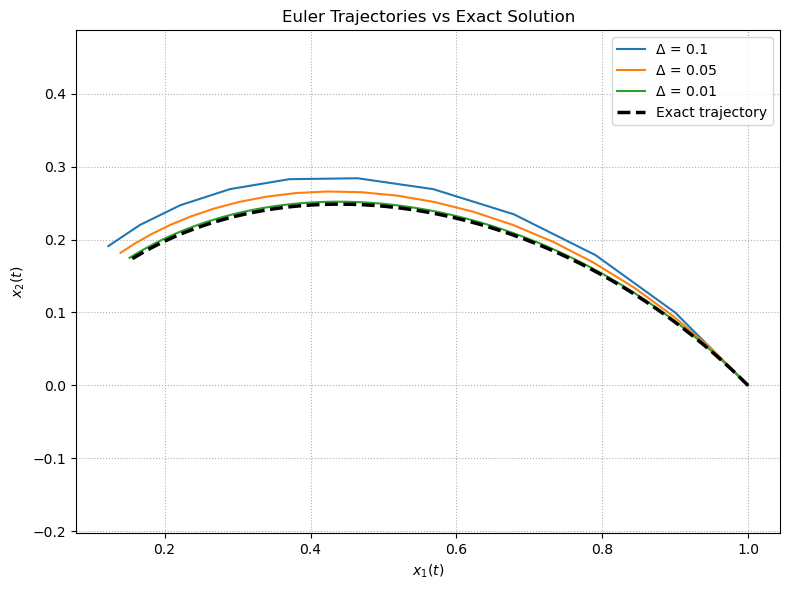

In [6]:
# Define the vector field  f(x, t)
def f_system(x, t):
    """
    f(x, t) for the system:
        x1' = -a(t)*x1 - b(t)*x2
        x2' =  b(t)*x1 - a(t)*x2
    where  a(t)=1+sin(t),  b(t)=cos(t)
    """
    a = 1 + np.sin(t)
    b = np.cos(t)
    dx1 = -a * x[0] - b * x[1]
    dx2 =  b * x[0] - a * x[1]
    return np.array([dx1, dx2])

# Parameters and integration
x0 = np.array([1.0, 0.0])  # starting point
T = 1.0                    # integrate over [0,1]
deltas = [0.1, 0.05, 0.01] # step sizes

plt.figure(figsize=(8, 6))

for Δ in deltas:
    N = int(T / Δ)
    tvals, xvals = euler_ode_solver(x0, f_system, T, N)
    plt.plot(xvals[:, 0], xvals[:, 1], label=f"Δ = {Δ}")

# True (analytic) solution
t_true = np.linspace(0, 1, 500)
r_true = np.exp(-1 - t_true + np.cos(t_true))
theta_true = -np.sin(t_true)
x1_true = r_true * np.cos(np.sin(t_true))
x2_true = r_true * np.sin(np.sin(t_true))

plt.plot(x1_true, x2_true, 'k--', lw=2.5, label="Exact trajectory")

# Plot formatting
plt.title("Euler Trajectories vs Exact Solution")
plt.xlabel("$x_1(t)$")
plt.ylabel("$x_2(t)$")
plt.grid(True, ls=':')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

#### SDE Problems

**Problem 1**

We want code to generate realizations for a stochastic differential equation of the form:

$$
dX_t = f(t, X_t)\,dt + g(t, X_t)\,dB_t
$$

where $f$ and $g$ are functions of two variables (time and position).

Write a function that takes as inputs:

- $X_0$: starting value of the process $X_t$ at time $t = 0$
- $f$: function (of time and position) determining the drift of the process
- $g$: function (of time and position) determining the diffusion (scale) of the process
- $T$: final time at which we get a realization
- $N$: number of subdivisions of the interval $[0, T]$ so that $\Delta = T/N$

and returns a 2D NumPy array of shape $(N+1) \times 2$, where:

- Column 0 consists of times $0, \Delta, 2\Delta, \ldots, N\Delta = T$
- Column 1 gives the approximate realization
  $$
  X_0, X_\Delta, X_{2\Delta}, \ldots, X_{N\Delta}
  $$
  for the process.

In [1]:
import numpy as np

def euler_maruyama_1d(X0, f, g, T, N, rng=None):
    """
    Euler-Maruyama for a 1D SDE:
        dX_t = f(t, X_t) dt + g(t, X_t) dB_t

    Parameters
    ----------
    X0 : float
        Initial value X(0)
    f, g : callables
        f(t, x) and g(t, x)
    T : float
        Final time
    N : int
        Number of steps (Δ = T/N)
    rng : np.random.Generator or None
        Random generator (for reproducibility). If None, uses default.

    Returns
    -------
    out : np.ndarray, shape (N+1, 2)
        Column 0: times t_n = nΔ
        Column 1: path X(t_n)
    """
    if rng is None:
        rng = np.random.default_rng()

    Δ = T / N
    t = np.linspace(0.0, T, N + 1)
    X = np.empty(N + 1, dtype=float)
    X[0] = float(X0)

    # Gaussian increments for Brownian motion: ΔB_n ~ N(0, Δ)
    dW = rng.normal(loc=0.0, scale=np.sqrt(Δ), size=N)

    for n in range(N):
        tn = t[n]
        Xn = X[n]
        X[n + 1] = Xn + f(tn, Xn) * Δ + g(tn, Xn) * dW[n]

    return np.column_stack([t, X])

**Problem 2**

Consider the process with $X_0 = 10$ satisfying the stochastic differential equation

$$
dX_t = f(t, X_t)\,dt + g(t, X_t)\,dB_t,
$$

where:

$$
f(t, x) = \frac{e^t}{x^2}, \qquad g(t, x) = \cos^2(2\pi t).
$$

For a given realization over $t \in [0, 1]$, define its **range** as:

$$
R = \max_{t \in [0,1]} X_t - \min_{t \in [0,1]} X_t
$$

Plot a few realizations of the process for $t \in [0, 1]$.

We would like to estimate the expected value $\mathbb{E}[R]$.  
Use your function from **Problem 1** to generate 1000 sample realizations, compute $\mathbb{E}[R]$, and construct an approximate **95% confidence interval**.

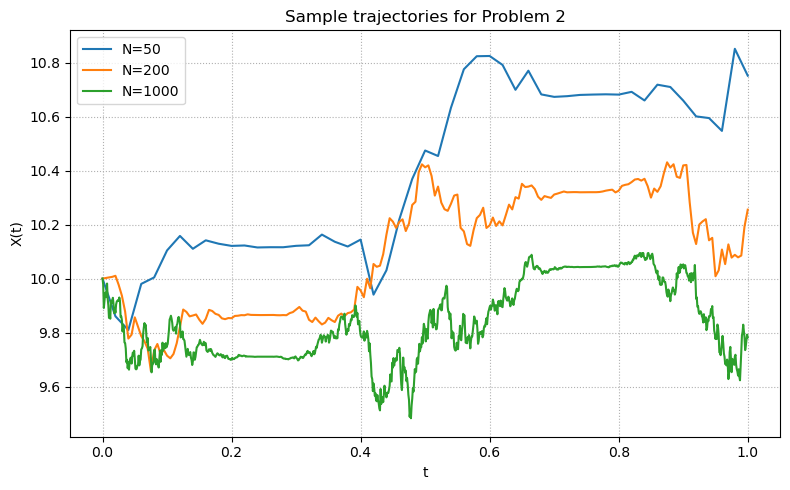

E[R] ≈ 0.9404
95% CI ≈ (0.9233, 0.9575)
sd ≈ 0.2756, se ≈ 0.0087


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define f and g for the problem
def f_prob2(t, x):
    return np.exp(t) / (x**2)

def g_prob2(t, x):
    return (np.cos(2 * np.pi * t))**2

# One path for plotting (several Δ values)
def simulate_and_plot_trajectories():
    X0 = 10.0
    T = 1.0
    steps_list = [50, 200, 1000]  # coarse -> fine
    rng = np.random.default_rng(123)

    plt.figure(figsize=(8, 5))
    for N in steps_list:
        out = euler_maruyama_1d(X0, f_prob2, g_prob2, T, N, rng=rng)
        t, X = out[:, 0], out[:, 1]
        plt.plot(t, X, label=f"N={N}")

    plt.title("Sample trajectories for Problem 2")
    plt.xlabel("t")
    plt.ylabel("X(t)")
    plt.grid(True, ls=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

simulate_and_plot_trajectories()

# Monte Carlo estimate of E[R] and 95% CI
def estimate_range_mean_CI(M=1000, N=1000, seed=42):
    """
    Monte Carlo estimation of E[R] where R = max_t X_t - min_t X_t on [0,1].
    """
    rng = np.random.default_rng(seed)
    X0, T = 10.0, 1.0
    Rvals = np.empty(M, dtype=float)

    for m in range(M):
        out = euler_maruyama_1d(X0, f_prob2, g_prob2, T, N, rng=rng)
        X = out[:, 1]
        Rvals[m] = X.max() - X.min()

    mean_R = Rvals.mean()
    sd_R = Rvals.std(ddof=1)
    se_R = sd_R / np.sqrt(M)
    ci_low = mean_R - 1.96 * se_R
    ci_high = mean_R + 1.96 * se_R
    return mean_R, (ci_low, ci_high), sd_R, se_R

mean_R, CI_R, sd_R, se_R = estimate_range_mean_CI(M=1000, N=1000, seed=7)
print(f"E[R] ≈ {mean_R:.4f}")
print(f"95% CI ≈ ({CI_R[0]:.4f}, {CI_R[1]:.4f})")
print(f"sd ≈ {sd_R:.4f}, se ≈ {se_R:.4f}")

**Problem 3**

We want to compare two ways of generating realizations of a transformed process $Y_t$ that depends on a process $X_t$ satisfying an SDE of the form in **Problem 1**.

Let:

$$
Y_t = h(t, X_t)
$$

There are two possible methods:

---

### **Method 1**
Generate $X_t$ for $t = 0, \Delta, 2\Delta, \ldots$,  
and define $Y_{n\Delta} = h(n\Delta, X_{n\Delta})$.

---

### **Method 2**
Use **Ito’s Lemma** to find the SDE satisfied by $Y_t$ (driven by $X_t$),  
and simulate realizations of $Y_t$ directly (taking $Y_0 = h(0, X_0)$).

---

### **Task**

Write a function that takes as inputs:

- the same inputs as in **Problem 1**
- a function $h(t, x)$
- the partial derivatives:
  - $\dfrac{\partial h}{\partial t}(t, x)$  
  - $\dfrac{\partial h}{\partial x}(t, x)$  
  - $\dfrac{\partial^2 h}{\partial x^2}(t, x)$  

and as output returns a 2D NumPy array of shape $(N+1) \times 4$, where:

- Column 0: times $0, \Delta, 2\Delta, \ldots, N\Delta = T$
- Column 1: approximate realization of $X_t$
- Column 2: approximate realization of $Y_t$ using **Method 1**
- Column 3: approximate realization of $Y_t$ using **Method 2**

In [3]:
def compare_h_methods_1d(X0, f, g, h, h_t, h_x, h_xx, T, N, rng=None):
    """
    Compare Method 1 (transform-after) vs Method 2 (Ito SDE) for Y = h(t, X_t).

    Returns
    -------
    out : np.ndarray, shape (N+1, 4)
        Column 0: t_n
        Column 1: X(t_n)
        Column 2: Y^(1)(t_n) = h(t_n, X(t_n))
        Column 3: Y^(2)(t_n) via Ito SDE with the SAME Brownian increments
    """
    if rng is None:
        rng = np.random.default_rng()

    Δ = T / N
    t = np.linspace(0.0, T, N + 1)
    X = np.empty(N + 1)
    Y1 = np.empty(N + 1)
    Y2 = np.empty(N + 1)

    # Brownian increments for both X and Y2 so they share the same driver
    dW = rng.normal(0.0, np.sqrt(Δ), size=N)

    # Initialize
    X[0] = float(X0)
    Y1[0] = h(0.0, X[0])
    Y2[0] = h(0.0, X[0])

    for n in range(N):
        tn = t[n]
        Xn = X[n]
        # Step X
        drift_X = f(tn, Xn)
        diff_X  = g(tn, Xn)
        X[n + 1] = Xn + drift_X * Δ + diff_X * dW[n]

        # Method 1: transform after
        Y1[n + 1] = h(t[n + 1], X[n + 1])

        # Method 2: Ito SDE for Y (same dW)
        # dY = (h_t + h_x f + 1/2 h_xx g^2) dt + h_x g dW
        drift_Y = h_t(tn, Xn) + h_x(tn, Xn) * drift_X + 0.5 * h_xx(tn, Xn) * (diff_X ** 2)
        diff_Y  = h_x(tn, Xn) * diff_X
        Y2[n + 1] = Y2[n] + drift_Y * Δ + diff_Y * dW[n]

    return np.column_stack([t, X, Y1, Y2])

**Problem 4**

Transform the process $X_t$ from **Problem 2** by taking:

$$
Y_t = \frac{X_t^3}{1 + t}
$$

and for various values of $N$ (defining $\Delta$), compute:

$$
\max_t \left|\, Y_t^{(1)} - Y_t^{(2)} \,\right|
$$

where $Y_t^{(1)}$ and $Y_t^{(2)}$ are the realizations obtained using **Method 1** and **Method 2** respectively from **Problem 3**.

In other words, determine for each $\Delta$ the **maximum absolute difference** between the two ways of realizing the process $Y_t$.

N=  50  max|Y1 - Y2| ≈ 1.495437e+01
N= 100  max|Y1 - Y2| ≈ 7.649439e+00
N= 200  max|Y1 - Y2| ≈ 2.437348e+00
N= 400  max|Y1 - Y2| ≈ 1.471846e+00
N= 800  max|Y1 - Y2| ≈ 5.306440e-01
N=1600  max|Y1 - Y2| ≈ 1.189789e+00


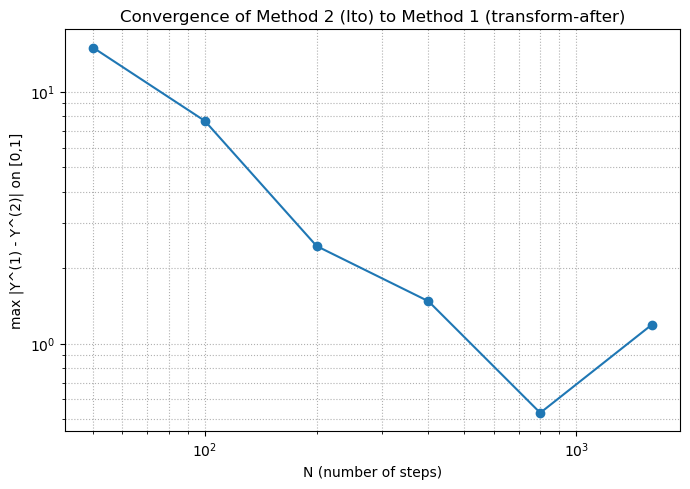

In [4]:
# Define h and its derivatives for Problem 4
def h(t, x):
    return x**3 / (1.0 + t)

def h_t(t, x):
    return -(x**3) / ((1.0 + t)**2)

def h_x(t, x):
    return (3.0 * x**2) / (1.0 + t)

def h_xx(t, x):
    return (6.0 * x) / (1.0 + t)

# Driver to compute max |Y1 - Y2| for various step sizes
def max_diff_vs_steps(N_list=(50, 100, 200, 400, 800), seed=123):
    X0, T = 10.0, 1.0
    rng = np.random.default_rng(seed)
    results = []

    for N in N_list:
        out = compare_h_methods_1d(
            X0=X0, f=f_prob2, g=g_prob2,
            h=h, h_t=h_t, h_x=h_x, h_xx=h_xx,
            T=T, N=N, rng=rng
        )
        Y1 = out[:, 2]
        Y2 = out[:, 3]
        max_abs_diff = np.max(np.abs(Y1 - Y2))
        results.append((N, max_abs_diff))

    return np.array(results, dtype=float)

results = max_diff_vs_steps(N_list=[50, 100, 200, 400, 800, 1600], seed=2025)
for N, md in results:
    print(f"N={int(N):4d}  max|Y1 - Y2| ≈ {md:.6e}")

# Optional: visualize convergence
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.loglog(results[:,0], results[:,1], marker='o')
plt.title("Convergence of Method 2 (Ito) to Method 1 (transform-after)")
plt.xlabel("N (number of steps)")
plt.ylabel("max |Y^(1) - Y^(2)| on [0,1]")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()